In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!pip install pycaret
from pycaret.classification import *
#from pycaret.regression import *

# Importing the data - only use *.MLReady.csv files!!!

In [20]:
df=pd.read_csv("../../data/FM_FULL_EPOCH2_MLReady.csv")
df.head()

,Unnamed: 0,origChannel,origIntRate,origUPB,origLTV,numBorrowers,origDebtIncRatio,borrCreditScore,loanPurp,zipCode,...,fmacRateVolatility,fredRate,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct,origYear,origMonth
0,0,2,5.125,348000,87,1,50,689,2,51,...,0.041667,2.87,-0.125,-0.085,-0.005,-0.023810,-0.016865,-0.000975,2009,2
1,1,3,4.625,195000,52,2,54,703,1,82,...,0.041667,2.87,-0.625,0.415,-0.505,-0.119048,0.082341,-0.098441,2009,2
2,2,2,4.875,342000,80,1,54,746,1,981,...,0.041667,2.87,-0.375,0.165,-0.255,-0.071429,0.032738,-0.049708,2009,2
3,3,1,5.375,93000,70,1,50,780,1,496,...,0.041667,2.87,0.125,-0.335,0.245,0.023810,-0.066468,0.047758,2009,2
4,4,1,4.875,182000,76,2,22,802,1,18,...,0.041667,2.87,-0.375,0.165,-0.255,-0.071429,0.032738,-0.049708,2009,2


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119696 entries, 0 to 119695
Data columns (total 32 columns):
Unnamed: 0            119696 non-null int64
origChannel           119696 non-null int64
origIntRate           119696 non-null float64
origUPB               119696 non-null int64
origLTV               119696 non-null int64
numBorrowers          119696 non-null int64
origDebtIncRatio      119696 non-null int64
borrCreditScore       119696 non-null int64
loanPurp              119696 non-null int64
zipCode               119696 non-null int64
pMIperct              119696 non-null float64
mortInsType           119696 non-null int64
bestCreditScore       119696 non-null int64
worstCreditScore      119696 non-null int64
avgCreditScore        119696 non-null int64
bankNumber            119696 non-null int64
stateNumber           119696 non-null int64
mSA                   119696 non-null int64
zeroBalCode           119696 non-null int64
fmacRateMax           119696 non-null float64
fma

## Remove columns not involved in 'Foreclosure or Not' query

In [22]:
df.drop(['Unnamed: 0'],1,inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119696 entries, 0 to 119695
Data columns (total 31 columns):
origChannel           119696 non-null int64
origIntRate           119696 non-null float64
origUPB               119696 non-null int64
origLTV               119696 non-null int64
numBorrowers          119696 non-null int64
origDebtIncRatio      119696 non-null int64
borrCreditScore       119696 non-null int64
loanPurp              119696 non-null int64
zipCode               119696 non-null int64
pMIperct              119696 non-null float64
mortInsType           119696 non-null int64
bestCreditScore       119696 non-null int64
worstCreditScore      119696 non-null int64
avgCreditScore        119696 non-null int64
bankNumber            119696 non-null int64
stateNumber           119696 non-null int64
mSA                   119696 non-null int64
zeroBalCode           119696 non-null int64
fmacRateMax           119696 non-null float64
fmacRateMin           119696 non-null float64
f

# Turn zero Balance Code Into binary "0" GOOD and "1" BAD

In [24]:
df.zeroBalCode.unique()

array([1, 0], dtype=int64)

In [25]:
#Checking datatypes of individual feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119696 entries, 0 to 119695
Data columns (total 31 columns):
origChannel           119696 non-null int64
origIntRate           119696 non-null float64
origUPB               119696 non-null int64
origLTV               119696 non-null int64
numBorrowers          119696 non-null int64
origDebtIncRatio      119696 non-null int64
borrCreditScore       119696 non-null int64
loanPurp              119696 non-null int64
zipCode               119696 non-null int64
pMIperct              119696 non-null float64
mortInsType           119696 non-null int64
bestCreditScore       119696 non-null int64
worstCreditScore      119696 non-null int64
avgCreditScore        119696 non-null int64
bankNumber            119696 non-null int64
stateNumber           119696 non-null int64
mSA                   119696 non-null int64
zeroBalCode           119696 non-null int64
fmacRateMax           119696 non-null float64
fmacRateMin           119696 non-null float64
f

# Review values for dates and slice (if needed) the timeframe you want

In [26]:
df.origYear.unique()

array([2009, 2010, 2011, 2012, 2013], dtype=int64)

In [27]:
df['origMonth'].unique()

array([ 2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12,  1], dtype=int64)

# Coerce the column dtype (int in this case)

In [28]:
df = df.astype({'origLTV':'int','numBorrowers':'int','origDebtIncRatio':'int',\
               'borrCreditScore':'int','mortInsType':'int','bestCreditScore':'int',\
               'worstCreditScore':'int','avgCreditScore':'int','zeroBalCode':'object'})
#,'zeroBalCode':'int'

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119696 entries, 0 to 119695
Data columns (total 31 columns):
origChannel           119696 non-null int64
origIntRate           119696 non-null float64
origUPB               119696 non-null int64
origLTV               119696 non-null int32
numBorrowers          119696 non-null int32
origDebtIncRatio      119696 non-null int32
borrCreditScore       119696 non-null int32
loanPurp              119696 non-null int64
zipCode               119696 non-null int64
pMIperct              119696 non-null float64
mortInsType           119696 non-null int32
bestCreditScore       119696 non-null int32
worstCreditScore      119696 non-null int32
avgCreditScore        119696 non-null int32
bankNumber            119696 non-null int64
stateNumber           119696 non-null int64
mSA                   119696 non-null int64
zeroBalCode           119696 non-null object
fmacRateMax           119696 non-null float64
fmacRateMin           119696 non-null float64


In [30]:
#df.to_csv('D:\FM_FULL_EPOCH2_MLReady.csv')

# Review metrics last time before run (to have record of starting values)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119696 entries, 0 to 119695
Data columns (total 31 columns):
origChannel           119696 non-null int64
origIntRate           119696 non-null float64
origUPB               119696 non-null int64
origLTV               119696 non-null int32
numBorrowers          119696 non-null int32
origDebtIncRatio      119696 non-null int32
borrCreditScore       119696 non-null int32
loanPurp              119696 non-null int64
zipCode               119696 non-null int64
pMIperct              119696 non-null float64
mortInsType           119696 non-null int32
bestCreditScore       119696 non-null int32
worstCreditScore      119696 non-null int32
avgCreditScore        119696 non-null int32
bankNumber            119696 non-null int64
stateNumber           119696 non-null int64
mSA                   119696 non-null int64
zeroBalCode           119696 non-null object
fmacRateMax           119696 non-null float64
fmacRateMin           119696 non-null float64


In [32]:
df.head()

,origChannel,origIntRate,origUPB,origLTV,numBorrowers,origDebtIncRatio,borrCreditScore,loanPurp,zipCode,pMIperct,...,fmacRateVolatility,fredRate,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct,origYear,origMonth
0,2,5.125,348000,87,1,50,689,2,51,25.0,...,0.041667,2.87,-0.125,-0.085,-0.005,-0.023810,-0.016865,-0.000975,2009,2
1,3,4.625,195000,52,2,54,703,1,82,0.0,...,0.041667,2.87,-0.625,0.415,-0.505,-0.119048,0.082341,-0.098441,2009,2
2,2,4.875,342000,80,1,54,746,1,981,0.0,...,0.041667,2.87,-0.375,0.165,-0.255,-0.071429,0.032738,-0.049708,2009,2
3,1,5.375,93000,70,1,50,780,1,496,0.0,...,0.041667,2.87,0.125,-0.335,0.245,0.023810,-0.066468,0.047758,2009,2
4,1,4.875,182000,76,2,22,802,1,18,0.0,...,0.041667,2.87,-0.375,0.165,-0.255,-0.071429,0.032738,-0.049708,2009,2


In [41]:
model_setup = setup(df, target = 'zeroBalCode', ignore_low_variance = True, 
            categorical_features = ['numBorrowers', 'mortInsType', 'zipCode', 'bankNumber',
                                    'stateNumber'],
            numeric_features = ['origLTV', 'origDebtIncRatio', 'borrCreditScore', 'bestCreditScore', 'worstCreditScore',
                               'avgCreditScore'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,5802
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(119696, 31)"
4,Missing Values,False
5,Numeric Features,21
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


# Pycaret - Setup with categorical definition

## Compare Models with blacklist exclusions

In [43]:
model_results=compare_models(fold = 2)
model_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.864,0.7775,0.0473,0.5218,0.0865,0.0651
1,Logistic Regression,0.8636,0.682,0.0018,0.2,0.0035,0.0023
2,Gradient Boosting Classifier,0.8636,0.7701,0.0508,0.5,0.0922,0.0686
3,CatBoost Classifier,0.8629,0.7791,0.0683,0.4746,0.1193,0.0883
4,Extra Trees Classifier,0.8626,0.7112,0.0175,0.3814,0.0334,0.0225
5,Random Forest Classifier,0.8621,0.6524,0.0289,0.4188,0.0541,0.0371
6,Light Gradient Boosting Machine,0.8578,0.7627,0.1112,0.419,0.1757,0.1258
7,SVM - Linear Kernel,0.8565,0,0.0403,0.3123,0.0709,0.0404
8,Ada Boost Classifier,0.8557,0.7593,0.1471,0.4153,0.2157,0.1564
9,Ridge Classifier,0.8521,0,0.0692,0.3115,0.1129,0.0666


## Create models - store in variable

In [44]:
gbc = create_model('gbc', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8634,0.7801,0.0439,0.4762,0.0803,0.0587
1,0.8646,0.7759,0.0437,0.5556,0.0810,0.0623
2,0.8622,0.7948,0.0524,0.4615,0.0941,0.0682
3,0.8585,0.7620,0.0175,0.2353,0.0327,0.0140
4,0.8681,0.7915,0.0439,0.7692,0.0830,0.0693
Mean,0.8633,0.7809,0.0403,0.4996,0.0742,0.0545
SD,0.0031,0.0117,0.0118,0.1719,0.0214,0.0206


## Tune Models

In [ ]:
tuned_cat = tune_model('catboost')

## Ensemble models

In [38]:
gbc_bagged = ensemble_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8644,0.7762,0.0380,0.5200,0.0708,0.0533
1,0.8624,0.7606,0.0321,0.4400,0.0598,0.0420
2,0.8636,0.7720,0.0379,0.5000,0.0705,0.0522
3,0.8652,0.7763,0.0554,0.5588,0.1008,0.0781
4,0.8648,0.7409,0.0437,0.5556,0.0811,0.0624
5,0.8647,0.7563,0.0292,0.5556,0.0556,0.0425
6,0.8655,0.7681,0.0322,0.6111,0.0611,0.0482
7,0.8691,0.7631,0.0556,0.7600,0.1035,0.0866
8,0.8615,0.7441,0.0205,0.3500,0.0387,0.0240
9,0.8663,0.7796,0.0556,0.5938,0.1016,0.0802


## Evaluate Models

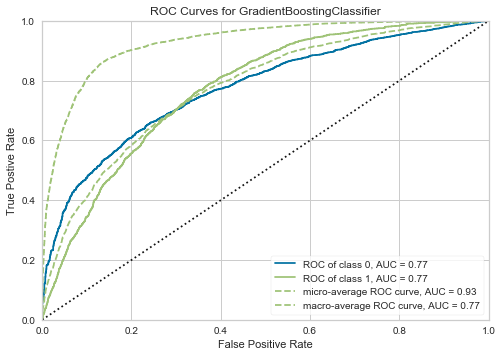

In [39]:
plot_model(gbc)

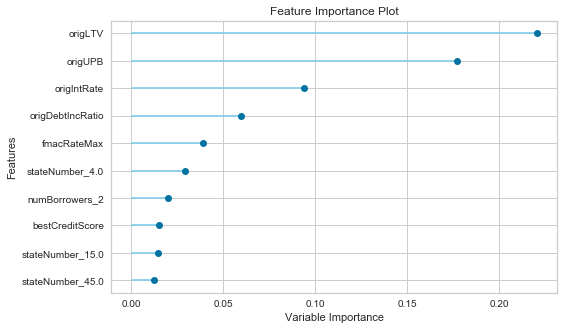

In [46]:
plot_model(gbc, plot = 'feature')

IntProgress(value=0, description='Processing: ', max=5)

KeyboardInterrupt: 

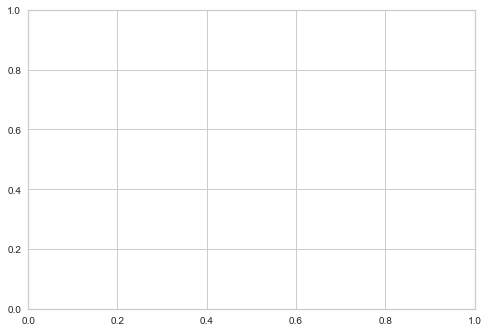

In [49]:
plot_model(gbc, plot = 'threshold')